In [7]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
df = pd.read_csv('/content/st-train.csv')
df.head(n=10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [8]:
data = df.sample(frac=0.85, random_state=None).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)
print("Data for Modeling :" + str(data.shape))
print("Unseen Data for Prediction :" + str(data_unseen.shape))

Data for Modeling :(7389, 14)
Unseen Data for Prediction :(1304, 14)


# AutoML
# Pycaret
# FBpropthet
# DARTS

In [9]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 103.1 MB/s eta 

In [10]:
from pycaret.classification import *

In [11]:
from sklearn.preprocessing import LabelEncoder
col=[]
df= data.copy()
label = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'O' or df[i].dtype == 'bool':
        if df[i].nunique() <3: # for bool

            df[i] = label.fit_transform(df[i])
        if df[i].nunique() > 2: # for multiple value
            col.append(i)
df = pd.get_dummies(df, columns= col)
data = df.copy()



In [12]:
from sklearn.preprocessing import LabelEncoder
col=[]
df= data_unseen.copy()
label = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'O' or df[i].dtype == 'bool':
        if df[i].nunique() <3: # for bool

            df[i] = label.fit_transform(df[i])
        if df[i].nunique() > 2: # for multiple value
            col.append(i)
df = pd.get_dummies(df, columns= col)
data_unseen = df.copy()


In [13]:
exp_clf101 = setup(data=df, target='Transported', session_id=150)

,Description,Value
0,Session id,150
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(1304, 3568)"
4,Transformed data shape,"(1304, 3568)"
5,Transformed train set shape,"(912, 3568)"
6,Transformed test set shape,"(392, 3568)"
7,Numeric features,3567
8,Rows with missing values,10.7%
9,Preprocess,True


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7806,0.8533,0.7465,0.7837,0.7620,0.5590,0.5627,13.4930
lr,Logistic Regression,0.7763,0.8660,0.7744,0.7605,0.7652,0.5518,0.5550,1.4960
ada,Ada Boost Classifier,0.7752,0.8536,0.7767,0.7570,0.7642,0.5497,0.5538,1.8610
gbc,Gradient Boosting Classifier,0.7741,0.8658,0.7512,0.7716,0.7576,0.5464,0.5511,3.4970
knn,K Neighbors Classifier,0.7719,0.8105,0.7907,0.7475,0.7664,0.5444,0.5483,1.3390
lightgbm,Light Gradient Boosting Machine,0.7696,0.8602,0.7395,0.7691,0.7511,0.5371,0.5410,1.4310
rf,Random Forest Classifier,0.7631,0.8433,0.6907,0.7866,0.7318,0.5217,0.5291,2.0200
ridge,Ridge Classifier,0.7544,0.0000,0.7186,0.7554,0.7335,0.5063,0.5105,1.1600
et,Extra Trees Classifier,0.7521,0.8193,0.6488,0.7919,0.7094,0.4977,0.5085,2.1050
dt,Decision Tree Classifier,0.7467,0.7458,0.7279,0.7370,0.7302,0.4917,0.4943,1.2320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [17]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7826,0.8659,0.8605,0.7255,0.7872,0.5683,0.5769
1,0.8478,0.9084,0.7907,0.8718,0.8293,0.6926,0.6953
2,0.8352,0.9157,0.7442,0.8889,0.8101,0.6665,0.6747
3,0.7143,0.8101,0.6512,0.7179,0.6829,0.4241,0.4257
4,0.7692,0.8290,0.7907,0.7391,0.7640,0.5387,0.5399
5,0.8132,0.9072,0.7674,0.8250,0.7952,0.6239,0.6253
6,0.7802,0.8040,0.7674,0.7674,0.7674,0.5591,0.5591
7,0.7473,0.7963,0.7442,0.7273,0.7356,0.4936,0.4937
8,0.7582,0.8304,0.7209,0.7561,0.7381,0.5138,0.5143


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
# HyperParameter Tuning
tuned_et = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6957,0.8849,0.9767,0.6087,0.7500,0.4105,0.4905
1,0.7609,0.9203,1.0000,0.6615,0.7963,0.5343,0.6038
2,0.8352,0.9244,0.9070,0.7800,0.8387,0.6721,0.6801
3,0.7253,0.8319,0.9070,0.6500,0.7573,0.4600,0.4946
4,0.7033,0.8425,0.9302,0.6250,0.7477,0.4196,0.4702
5,0.7802,0.9155,0.9535,0.6949,0.8039,0.5675,0.6049
6,0.6923,0.8079,0.8605,0.6271,0.7255,0.3945,0.4205
7,0.6703,0.8045,0.8605,0.6066,0.7115,0.3528,0.3828
8,0.6923,0.8406,0.9070,0.6190,0.7358,0.3974,0.4402


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


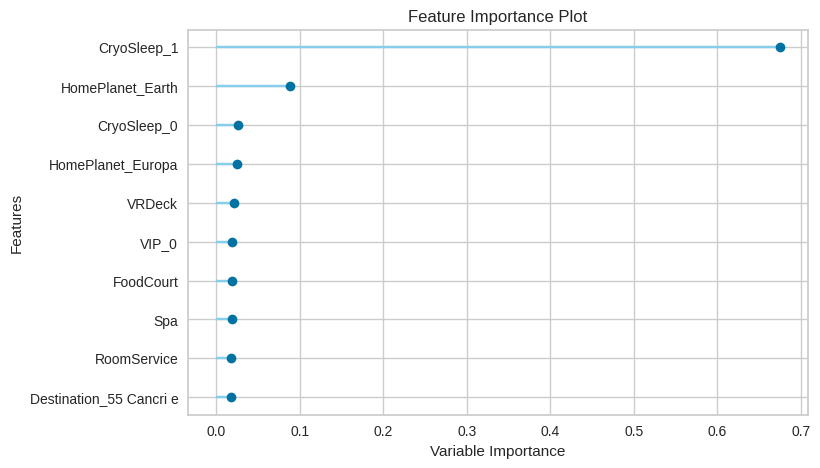

In [19]:
plot_model(tuned_et, plot='feature')

In [20]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7806,0.8444,0.6811,0.8235,0.7456,0.5558,0.5635


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_7899_03,PassengerId_7901_01,PassengerId_7902_01,PassengerId_7902_02,...,Name_Zedark Crantiale,Name_Zelowl Terry,Name_Zers Gene,Name_Zinoces Myling,Name_Zinonon Cralinal,Name_Zinor Axlentindy,Name_Zosmark Unaasor,Transported,prediction_label,prediction_score
1167,13.0,590.0,0.0,32.0,363.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9867
1011,29.0,311.0,7.0,665.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.8899
636,26.0,6.0,728.0,0.0,1273.0,1116.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9991
587,NaN,2502.0,0.0,44.0,23.0,29.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9338
175,35.0,635.0,3.0,0.0,NaN,25.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,29.0,1.0,764.0,1.0,265.0,1539.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.9356
33,30.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.9976
916,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.6761
62,31.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.8915


In [22]:
unseen_prediction = predict_model(tuned_et, data=data_unseen)
unseen_prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9057,0.9503,0.8894,0.9086,0.8989,0.8105,0.8107


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_7899_03,PassengerId_7901_01,PassengerId_7902_01,PassengerId_7902_02,...,Name_Zedark Crantiale,Name_Zelowl Terry,Name_Zers Gene,Name_Zinoces Myling,Name_Zinonon Cralinal,Name_Zinor Axlentindy,Name_Zosmark Unaasor,Transported,prediction_label,prediction_score
0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0.8903
1,36.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0.8915
2,60.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.8502
3,17.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0.7178
4,49.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.7813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9661
1300,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.6590
1301,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0.9750
1302,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.9949
